In [4]:
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

In [5]:
base = pd.read_csv("../Project_1/500_Cities__Obesity_among_adults_aged___18_years.csv")
base.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003004600,Obesity among adults aged >=18 Years,%,...,18.0,NaN,NaN,"3,735","(21.3510749539, -157.825340793)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003001400,Obesity among adults aged >=18 Years,%,...,19.7,NaN,NaN,"2,550","(21.2772209725, -157.806213514)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
2,2017,GA,Georgia,Roswell,City,BRFSS,Unhealthy Behaviors,1367284,Obesity among adults aged >=18 Years,%,...,23.9,NaN,NaN,"88,346","(34.0391384583, -84.3512225277)",UNHBEH,OBESITY,1367284.0,NaN,Obesity
3,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003010801,Obesity among adults aged >=18 Years,%,...,25.0,NaN,NaN,"2,969","(21.4491051468, -157.761542724)",UNHBEH,OBESITY,15003.0,1.500301e+10,Obesity
4,2017,GA,Georgia,Johns Creek,Census Tract,BRFSS,Unhealthy Behaviors,1342425-13121011425,Obesity among adults aged >=18 Years,%,...,21.9,NaN,NaN,"6,906","(34.013011213, -84.2405514785)",UNHBEH,OBESITY,1342425.0,1.312101e+10,Obesity


In [6]:
print(len(base["CityName"].unique()))

475


In [7]:
base["Data_Value"]=base["Data_Value"].str.replace(',', '').astype(int)

AttributeError: Can only use .str accessor with string values!

In [8]:
base.head()

,Year,StateAbbr,StateDesc,CityName,GeographicLevel,DataSource,Category,UniqueID,Measure,Data_Value_Unit,...,High_Confidence_Limit,Data_Value_Footnote_Symbol,Data_Value_Footnote,PopulationCount,GeoLocation,CategoryID,MeasureId,CityFIPS,TractFIPS,Short_Question_Text
0,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003004600,Obesity among adults aged >=18 Years,%,...,18.0,NaN,NaN,"3,735","(21.3510749539, -157.825340793)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
1,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003001400,Obesity among adults aged >=18 Years,%,...,19.7,NaN,NaN,"2,550","(21.2772209725, -157.806213514)",UNHBEH,OBESITY,15003.0,1.500300e+10,Obesity
2,2017,GA,Georgia,Roswell,City,BRFSS,Unhealthy Behaviors,1367284,Obesity among adults aged >=18 Years,%,...,23.9,NaN,NaN,"88,346","(34.0391384583, -84.3512225277)",UNHBEH,OBESITY,1367284.0,NaN,Obesity
3,2017,HI,Hawaii,Honolulu,Census Tract,BRFSS,Unhealthy Behaviors,15003010801,Obesity among adults aged >=18 Years,%,...,25.0,NaN,NaN,"2,969","(21.4491051468, -157.761542724)",UNHBEH,OBESITY,15003.0,1.500301e+10,Obesity
4,2017,GA,Georgia,Johns Creek,Census Tract,BRFSS,Unhealthy Behaviors,1342425-13121011425,Obesity among adults aged >=18 Years,%,...,21.9,NaN,NaN,"6,906","(34.013011213, -84.2405514785)",UNHBEH,OBESITY,1342425.0,1.312101e+10,Obesity


In [9]:
group= base.groupby(["StateDesc","CityName"])
meanvalue = group["Data_Value"].mean()

In [10]:
maxvalue = meanvalue.max()
meanvalue = pd.DataFrame(meanvalue).reset_index()

In [11]:
meanvalue.loc[(meanvalue["Data_Value"]==maxvalue)]

,StateDesc,CityName,Data_Value
240,Indiana,Gary,50.042424


In [12]:
meanvalue

,StateDesc,CityName,Data_Value
0,Alabama,Birmingham,40.329348
1,Alabama,Hoover,29.160000
2,Alabama,Huntsville,35.896667
3,Alabama,Mobile,38.803896
4,Alabama,Montgomery,39.204839
...,...,...,...
495,Wisconsin,Madison,26.304478
496,Wisconsin,Milwaukee,35.874299
497,Wisconsin,Racine,39.504167
498,Wisconsin,Waukesha,30.763636


In [13]:
USDA = pd.read_csv('../data/USDA_Farmers_Market.csv')
USDA.head()

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Coffee,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,Y,N,N,Y,Y,N,N,6/20/17 22:43
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,N,Y,N,N,N,N,N,N,6/21/17 17:15
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,N,Y,N,N,N,N,N,N,10/28/14 9:49
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,N,3/1/12 10:38


In [14]:
merged_df = USDA.merge(meanvalue, how = 'left', on = ['CityName', 'StateDesc'])
merged_df

,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
0,1018261,Caledonia Farmers Market Association - Danville,https://sites.google.com/site/caledoniafarmers...,https://www.facebook.com/Danville.VT.Farmers.M...,NaN,NaN,NaN,NaN,Danville,Caledonia,...,Y,Y,N,N,Y,Y,N,N,6/20/17 22:43,NaN
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,Y,N,N,N,N,N,N,6/21/17 17:15,29.037500
2,1009364,106 S. Main Street Farmers Market,http://thetownofsixmile.wordpress.com/,NaN,NaN,NaN,NaN,106 S. Main Street,Six Mile,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2013,NaN
3,1010691,10th Steet Community Farmers Market,NaN,NaN,NaN,NaN,http://agrimissouri.com/mo-grown/grodetail.php...,10th Street and Poplar,Lamar,Barton,...,N,Y,N,N,N,N,N,N,10/28/14 9:49,NaN
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,3/1/12 10:38,25.034450
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8811,1004767,Zia Bernalillo Farmers' Market,http://www.eatfreshnm.org/,https://www.facebook.com/farmersmarketsnm?ref=hl,NaN,NaN,NaN,335 S. Camino del Pueblo,Bernalillo,Sandoval,...,Y,Y,N,N,N,N,N,N,6/5/14 14:40,NaN
8812,1018362,Zimmerman Farmers' Market,http://Pzfarmersmarket.org,Princeton-zimmerman farmers market,NaN,NaN,NaN,25850 Main Street,Zimmerman,Sherburne,...,N,Y,N,N,N,N,N,N,6/22/17 19:37,NaN
8813,1012380,Zion Canyon Farmers Market,http://zionharvest.org,https://www.facebook.com/ZionCanyonFarmersMarket/,NaN,NaN,NaN,1212 Zion Park Blvd.,Springdale,Washington,...,N,Y,N,N,Y,N,N,N,7/9/16 17:00,NaN
8814,1004686,Zionsville Farmers Market,http://www.zionsvillefarmersmarket.org,NaN,NaN,NaN,NaN,Hawthorne & Main Street,Zionsville,Boone,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2009,NaN


In [15]:
merged_df=merged_df.dropna(subset=["Data_Value"])
merged_df


,FMID,MarketName,Website,Facebook,Twitter,Youtube,OtherMedia,street,CityName,county,...,Beans,Fruits,Grains,Juices,Mushrooms,PetFood,Tofu,WildHarvested,updateTime,Data_Value
1,1018318,Stearns Homestead Farmers' Market,http://www.StearnsHomestead.com,StearnsHomesteadFarmersMarket,NaN,NaN,NaN,6975 Ridge Road,Parma,Cuyahoga,...,N,Y,N,N,N,N,N,N,6/21/17 17:15,29.037500
4,1002454,112st Madison Avenue,NaN,NaN,NaN,NaN,NaN,112th Madison Avenue,New York,New York,...,N,N,N,N,N,N,N,N,3/1/12 10:38,25.034450
5,1011100,12 South Farmers Market,http://www.12southfarmersmarket.com,12_South_Farmers_Market,@12southfrmsmkt,NaN,@12southfrmsmkt,3000 Granny White Pike,Nashville,Davidson,...,N,Y,N,Y,Y,Y,N,N,5/1/15 10:40,31.698101
6,1009845,125th Street Fresh Connect Farmers' Market,http://www.125thStreetFarmersMarket.com,https://www.facebook.com/125thStreetFarmersMarket,https://twitter.com/FarmMarket125th,NaN,Instagram--> 125thStreetFarmersMarket,"163 West 125th Street and Adam Clayton Powell,...",New York,New York,...,N,Y,N,Y,N,N,N,N,4/7/14 16:32,25.034450
7,1005586,12th & Brandywine Urban Farm Market,NaN,https://www.facebook.com/pages/12th-Brandywine...,NaN,NaN,https://www.facebook.com/delawareurbanfarmcoal...,12th & Brandywine Streets,Wilmington,New Castle,...,N,Y,N,N,N,N,N,N,4/3/14 15:43,39.573077
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8791,1019247,Your Neighborhood Farmers Market-CityCentre,http://www.YourNeighborhoodFarmersMarket.com,https://www.facebook.com/yourneighborhoodfarme...,NaN,NaN,NaN,800 Towne and County BLVD.,Houston,Harris,...,N,Y,N,Y,N,Y,N,Y,9/6/18 17:06,34.130144
8794,1019250,Your Neighborhood Farmers Market-Summerwood,http://www.YourNeighborhoodFarmersMarket.com,https://www.facebook.com/yourneighborhoodfarme...,NaN,NaN,NaN,14303 West Lake Houston Parkway,Houston,Harris,...,Y,Y,Y,Y,N,Y,N,Y,9/6/18 17:23,34.130144
8798,1007324,Youth Stands!,http://www.urbangreenworks.org,NaN,NaN,NaN,NaN,8240 NW 7th Ave,Miami,Miami-Dade,...,N,N,N,N,N,N,N,N,5/22/12 23:19,33.482524
8799,1007325,Youth Stands!,http://www.urbangreenworks.org,NaN,NaN,NaN,NaN,15700 NW 20th Ave,Miami Gardens,Miami-Dade,...,N,N,N,N,N,N,N,N,5/22/12 23:19,37.864000


In [16]:
test=merged_df['Data_Value']
test.describe()

count    1813.000000
mean       30.525629
std         5.992297
min        15.383333
25%        25.492570
50%        31.074359
75%        34.645055
max        50.042424
Name: Data_Value, dtype: float64

In [17]:
city=merged_df.groupby(['CityName','StateDesc']).size().reset_index(name="count")
city

,CityName,StateDesc,count
0,Abilene,Texas,1
1,Akron,Ohio,8
2,Alameda,California,1
3,Albany,Georgia,1
4,Albany,New York,9
...,...,...,...
410,Worcester,Massachusetts,24
411,Wyoming,Michigan,1
412,Yakima,Washington,2
413,Yonkers,New York,1


In [18]:
meanvalue_city = meanvalue.merge(city, how = 'left', on = ['CityName','StateDesc'])
meanvalue_city

,StateDesc,CityName,Data_Value,count
0,Alabama,Birmingham,40.329348,7.0
1,Alabama,Hoover,29.160000,2.0
2,Alabama,Huntsville,35.896667,4.0
3,Alabama,Mobile,38.803896,3.0
4,Alabama,Montgomery,39.204839,2.0
...,...,...,...,...
495,Wisconsin,Madison,26.304478,18.0
496,Wisconsin,Milwaukee,35.874299,14.0
497,Wisconsin,Racine,39.504167,3.0
498,Wisconsin,Waukesha,30.763636,2.0


In [19]:
city_count = meanvalue_city['Data_Value']
city_count.describe()

count    500.000000
mean      29.996838
std        6.112442
min       15.383333
25%       25.424375
50%       30.115000
75%       34.269035
max       50.042424
Name: Data_Value, dtype: float64

In [61]:
#df.groupby(["Group", "Size"]).size().reset_index(name="Time")


In [29]:
# The maximum x value for our chart will be 100
#x_limit = 52

# List of values from 0 to 100 each value being 1 greater than the last
x_axis = list(meanvalue_city['Data_Value'])

# Create array of data that we will use for our y values
y_axis = meanvalue_city.index.values
# Create array of data that we will use for our s values
s = meanvalue_city['count']

In [30]:
x_axis

[40.32934782608695,
 29.16,
 35.89666666666666,
 38.8038961038961,
 39.20483870967742,
 37.37222222222222,
 34.263157894736835,
 31.082608695652173,
 26.10327868852459,
 25.71702127659575,
 30.73166666666665,
 29.126016260162586,
 27.19111111111111,
 31.290782122905014,
 24.784126984126978,
 27.85,
 26.170731707317074,
 28.552112676056353,
 36.67419354838711,
 28.355555555555558,
 33.41304347826087,
 33.95,
 35.20943396226416,
 31.961111111111116,
 20.33888888888889,
 17.754545454545454,
 22.733766233766232,
 27.71818181818181,
 31.264285714285712,
 29.64444444444445,
 25.41,
 25.870000000000005,
 20.73428571428571,
 20.805,
 21.987999999999996,
 20.113636363636367,
 23.861904761904764,
 25.28,
 27.860000000000003,
 22.25714285714286,
 24.82448979591836,
 30.364000000000004,
 25.916000000000004,
 32.48709677419355,
 24.409677419354836,
 27.159459459459452,
 21.977777777777774,
 17.422727272727272,
 24.960869565217386,
 26.156666666666673,
 24.653125000000003,
 26.570000000000004,
 24.9

In [31]:
y_axis

array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
        13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
        26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
        39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
        52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
        65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
        78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
        91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
       104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
       117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
       130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
       143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
       156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
       169, 170, 171, 172, 173, 174, 175, 176, 177, 178, 179, 18

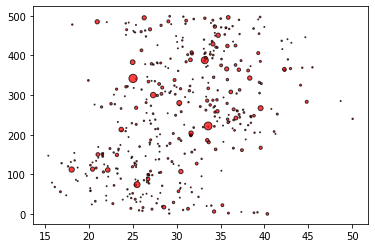

In [34]:
plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black",
            s=s, alpha=0.75)

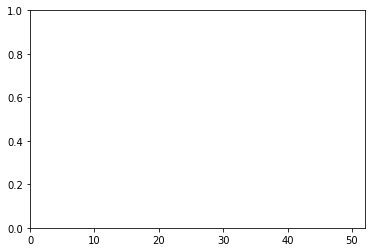

In [22]:
plt.xlim(0, x_limit)
plt.ylim(0, 1)
plt.show()